<a href="https://colab.research.google.com/github/Yukkitsune/TBank-Analytics/blob/main/Probability%20theory%20and%20mathematical%20statistics/homework2_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import ttest_ind, t
import matplotlib.pyplot as plt
from typing import List, Tuple
from math import sqrt

In [2]:
np.random.seed(42)

___

## Задание 1: t-test для независимых выборок (критерий Уэлча)
### Реализуйте тест Уэлча на python.
Для двух независимых выборок напишите функцию, которая возвращает значение t-статистики. Функция должна принимать на вход два массива, а возвращать значение t-статистики. В описании функции укажите статистическую гипотезу, для которой применяется критерий Уэлча.

P.s. Использовать ttest_ind запрещено

In [3]:
def welchs_test (x1: List, x2: List) -> float:
  '''
  Реализует тест Уэлча для двух независимых выборок
  Гипотезы:
  - H0: m1 = m2 (равенство средних генеральных совокупностей)
  - H1: m1 != m2 (неравенство средних генеральных совокупностей)
  '''
  first_mean = np.mean(x1)
  second_mean = np.mean(x2)
  first_std = np.std(x1, ddof=1)
  second_std = np.std(x2, ddof=1)
  numerator = first_mean - second_mean
  denominator = sqrt(first_std**2 / x1.size + second_std**2/x2.size)
  return  numerator / denominator

Проверим корректность функции, сравнив её результат с ttest_ind

In [4]:
x1 = np.random.uniform(low=400, high=2000, size=1000)
x2 = np.random.uniform(low=400, high=2000, size=1000)

In [5]:
print(welchs_test(x1=x1,x2=x2))
print(ttest_ind(a=x1, b=x2, equal_var=False))

-1.2827804972727095
TtestResult(statistic=np.float64(-1.2827804972727093), pvalue=np.float64(0.19971777738303223), df=np.float64(1997.9999354075085))


___

## Задание 2: Распределение t-статистики
### Используя метод Монте-Карло, постройте гистограмму распределения t-статистики для двух случаев:
1. Выборки взяты из одного равномерного распределения с параметрами a = 400, b = 2000.
2. Выборки взяты из разных нормальных распределений. Параметры распределений: mu_1 = 1210, sigma_1 = 500, mu_2 = 1200, sigma_2 = 350.

Для построения гистограмы будет достаточно выборок объёмом в 10000 наблюдений каждая.

Используйте функцию из задания 1

1. Выборки взяты из одного равномерного распределения с параметрами a = 400, b = 2000.

In [6]:
def uniform_monte_carlo (a: int, b: int, size: int, iterations: int) -> List:
  t_statistics = []
  for _ in range (iterations):
    X = np.random.uniform(low=a, high=b, size=size)
    selection = np.array_split(X,2)
    x1, x2 = selection[0], selection[1]
    t_statistics.append(welchs_test(x1, x2))
  return t_statistics

In [7]:
a, b = 400, 2000
size = 20000
iterations = 10000
t_statistics_uniform = uniform_monte_carlo(a=a, b=b, size=size, iterations=iterations)

(array([  3.,   1.,   2.,   3.,   2.,   1.,   2.,   4.,   3.,   7.,   4.,
          4.,  10.,  18.,  15.,  16.,  19.,  19.,  30.,  33.,  28.,  32.,
         52.,  50.,  61.,  71., 101.,  94.,  89.,  98., 116., 127., 131.,
        166., 163., 181., 208., 203., 222., 231., 282., 240., 260., 285.,
        290., 309., 311., 306., 294., 276., 293., 284., 265., 256., 281.,
        259., 261., 229., 214., 232., 200., 189., 179., 134., 138., 114.,
        134., 120.,  97.,  96.,  91.,  52.,  52.,  59.,  47.,  48.,  25.,
         30.,  23.,  27.,  10.,  17.,  12.,  14.,   6.,  10.,   8.,   5.,
          4.,   2.,   1.,   2.,   3.,   0.,   1.,   1.,   0.,   0.,   0.,
          2.]),
 array([-3.56716915, -3.49351763, -3.4198661 , -3.34621457, -3.27256305,
        -3.19891152, -3.12525999, -3.05160846, -2.97795694, -2.90430541,
        -2.83065388, -2.75700236, -2.68335083, -2.6096993 , -2.53604777,
        -2.46239625, -2.38874472, -2.31509319, -2.24144167, -2.16779014,
        -2.09413861, -2.02

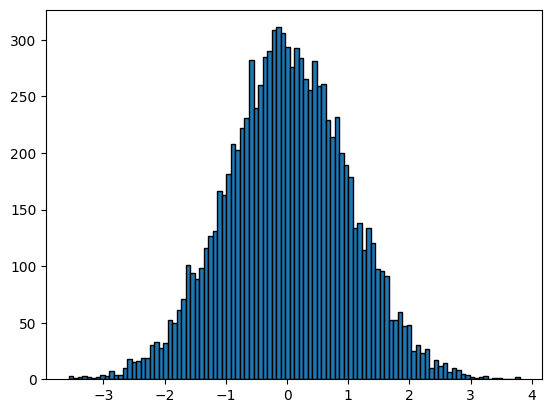

In [8]:
plt.hist(t_statistics_uniform, bins=100, edgecolor='black')

2. Выборки взяты из разных нормальных распределений. Параметры распределений: mu_1 = 1210, sigma_1 = 500, mu_2 = 1200, sigma_2 = 350.

In [9]:
def normal_monte_carlo_2_samples(mu_1:int, sigma_1:int, mu_2:int, sigma_2:int, size:int, iterations:int) -> List:
  t_statistics = []
  for _ in range(iterations):
    x1 = np.random.normal(loc=mu_1, scale=sigma_1, size=size)
    x2 = np.random.normal(loc=mu_2, scale=sigma_2, size=size)
    t_statistics.append(welchs_test(x1, x2))
  return t_statistics

In [10]:
mu_1, sigma_1 = 1210, 500
mu_2, sigma_2 = 1200, 350
size = 10000
iterations = 10000
t_statistics_normal = normal_monte_carlo_2_samples(mu_1=mu_1, sigma_1=sigma_1, mu_2=mu_2, sigma_2=sigma_2, size=size, iterations=iterations)

(array([  2.,   2.,   0.,   2.,   1.,   1.,   3.,   1.,  10.,   7.,   7.,
          4.,  11.,   9.,  16.,  15.,  26.,  15.,  20.,  33.,  37.,  54.,
         53.,  71.,  72.,  76., 100., 124., 124., 142., 138., 158., 189.,
        187., 192., 205., 243., 251., 275., 283., 293., 298., 322., 304.,
        334., 314., 310., 303., 282., 339., 308., 308., 261., 261., 239.,
        233., 223., 217., 178., 168., 157., 159., 135., 124.,  94.,  91.,
         80.,  69.,  69.,  75.,  51.,  28.,  45.,  34.,  17.,  21.,  12.,
         21.,  20.,  10.,   7.,   7.,   6.,   2.,   1.,   2.,   1.,   0.,
          2.,   0.,   0.,   2.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,
          1.]),
 array([-2.01611173, -1.93647157, -1.85683142, -1.77719126, -1.69755111,
        -1.61791095, -1.5382708 , -1.45863064, -1.37899048, -1.29935033,
        -1.21971017, -1.14007002, -1.06042986, -0.98078971, -0.90114955,
        -0.8215094 , -0.74186924, -0.66222909, -0.58258893, -0.50294878,
        -0.42330862, -0.34

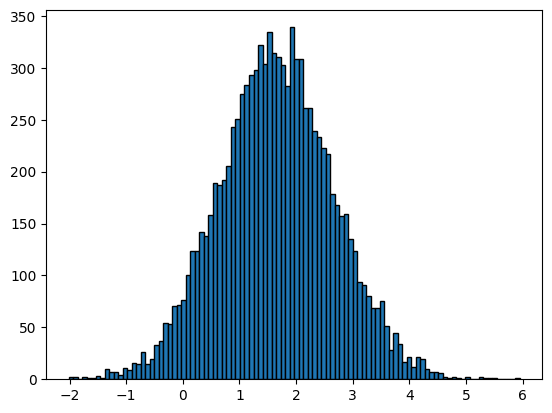

In [11]:
plt.hist(t_statistics_normal, bins=100, edgecolor='black')

___

## Задание 3: Связь t-распределения стьюдента с нормальным распределением
Распределение Стьюдента является однопараметрическим и зависит от n, числа случайных величин (т.е. от объёма выборки). Для случая (1) из задания 2 постройте несколько разных распределений t-статистики для выборок объёма 50, 1000 и 10000 элементов. Сравните полученные распределения с нормальным распределением, какими параметрами оно должно обладать?

Для расчета t-статистики используйте функцию из задания 1

In [12]:
def compare_uniform_normal(t_uniform:List, t_normal:List):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
  ax1.hist(t_uniform, bins=100, edgecolor='black')
  ax1.set_xlabel('t-статистика')
  ax1.grid(True)
  ax2.hist(t_normal, bins=100, edgecolor='black')
  ax2.set_xlabel('Нормальное распределение')
  ax2.grid(True)
  plt.show()

In [13]:
norm_dist = np.random.normal(loc=0, scale=1, size=10000)

In [14]:
a, b = 400, 2000
size = 50
iterations = 10000
t_uniform_50 = uniform_monte_carlo(a=a, b=b, size=size, iterations=iterations)

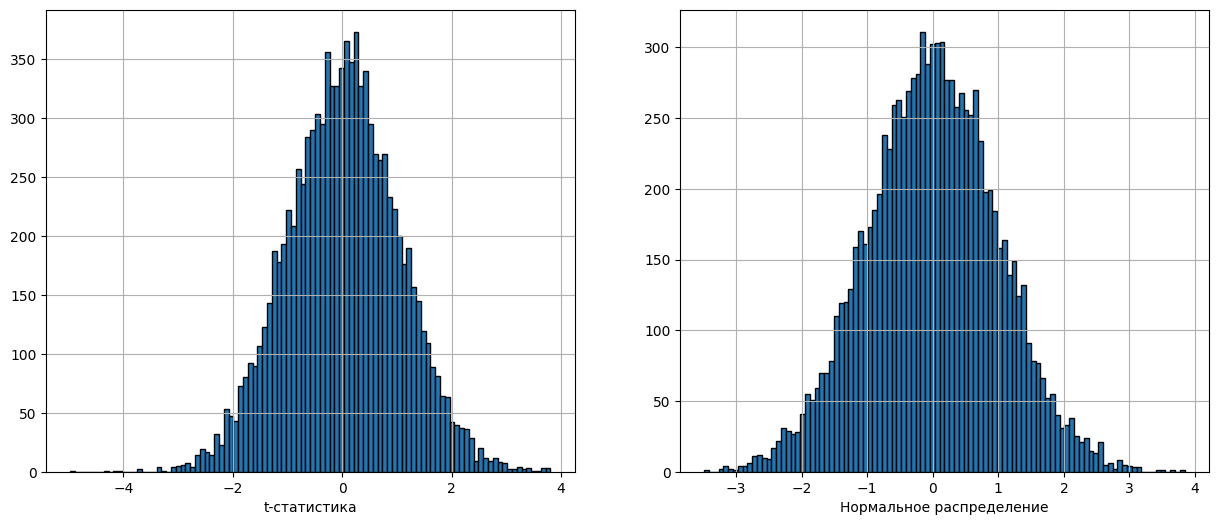

In [15]:
compare_uniform_normal(t_uniform=t_uniform_50, t_normal=norm_dist)

In [16]:
a, b = 400, 2000
size = 1000
iterations = 10000
t_uniform_1000 = uniform_monte_carlo(a=a, b=b, size=size, iterations=iterations)

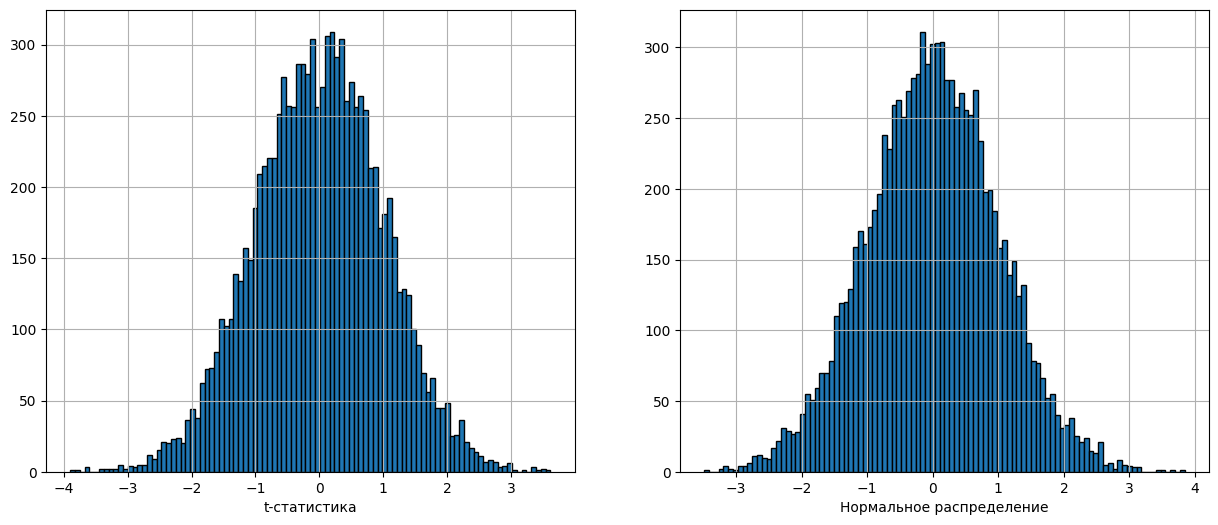

In [17]:
compare_uniform_normal(t_uniform=t_uniform_1000, t_normal=norm_dist)

In [18]:
a, b = 400, 2000
size = 10000
iterations = 10000
t_uniform_10000 = uniform_monte_carlo(a=a, b=b, size=size, iterations=iterations)

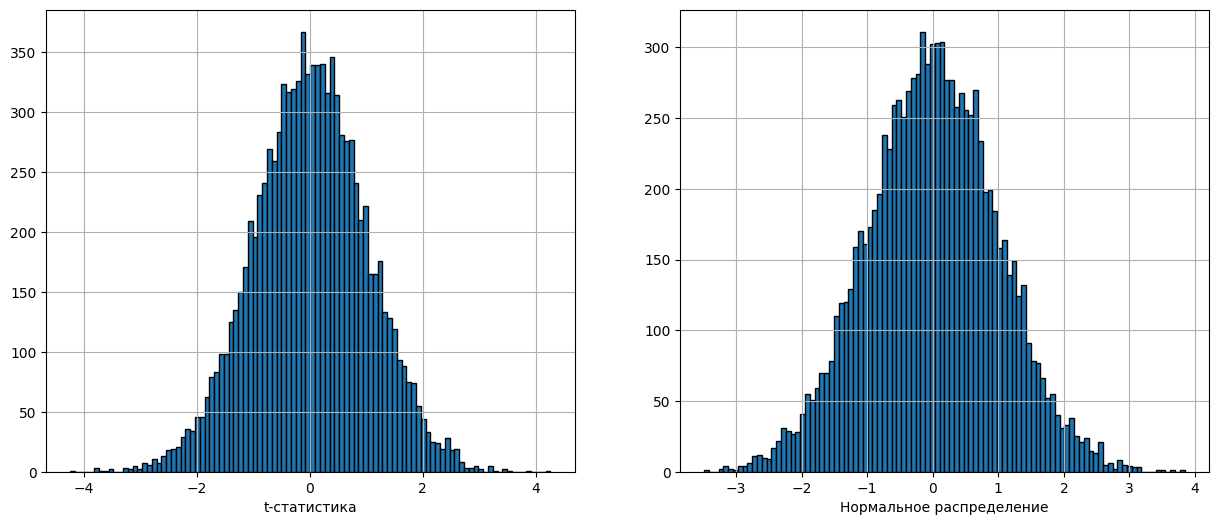

In [19]:
compare_uniform_normal(t_uniform=t_uniform_10000, t_normal=norm_dist)

**Сравните полученные распределения с нормальным распределением, какими параметрами оно должно обладать?**

Для того, чтобы полученное распределение было похоже на нормальное необходимо, чтобы его матожидание было близко к нулю, дисперсия была равна единице, оно должно быть симметрично и должен отсутствовать тяжелый хвост. Все эти параметры, как можно увидеть из формулировки задания, зависят от объема выборки - чем он больше, тем больше распределение t-статистик похоже на нормальное.

___

## Задание 4: Расчёт p-value на основе знания t-статистики
Для случая (2) из задания 2 с выборками объёмом в 10000 элементов посчитайте значение t-статистики. Вычислите значение p-value для получившегося значения t-статистики.

Добавьте в функцию реализации теста Уэлча из задания 1 расчёт p-value на основе рассчитанного значения t-статистики. Функция должна принимать на вход два массива, а возвращать значения t-статистики и p-value для двусторонней альтернативной гипотезы. Текстом напишите ответ на вопрос: как будет отличаться p-value для односторонней и двусторонней альтернативной гипотезы?

In [20]:
def welchs_test_pvalue (x1: List, x2: List) -> Tuple[float, float]:
  '''
  Реализует тест Уэлча для двух независимых выборок с вычислением p_value
  Гипотезы:
  - H0: m1 = m2 (равенство средних генеральных совокупностей)
  - H1: m1 != m2 (неравенство средних генеральных совокупностей)
  '''
  #Рассчитаем t-статистику
  x1 = np.array(x1)
  x2 = np.array(x2)
  first_mean = np.mean(x1)
  second_mean = np.mean(x2)
  first_std = np.std(x1, ddof=1)
  second_std = np.std(x2, ddof=1)
  numerator = first_mean - second_mean
  denominator = sqrt(first_std**2 / x1.size + second_std**2/x2.size)
  t_statistic = numerator / denominator

  #Рассчитаем степени свободы, затем найдем p_value
  n1 = x1.size
  n2 = x2.size
  df_numerator = (first_std**2 / n1 + second_std**2 / n2)**2
  df_denominator = (first_std**4 / (n1**2 * (n1 - 1)) + second_std**4 / (n2**2 * (n2 - 1)))
  df = df_numerator / df_denominator
  p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df))

  print(f'statistic = {t_statistic}, p_value = {p_value}')
  return t_statistic, p_value

Проверим корректность функции, сравнив её результат с ttest_ind

In [21]:
x1 = np.random.uniform(low=400, high=2000, size=1000)
x2 = np.random.uniform(low=400, high=2000, size=1000)

In [22]:
t_stat, p_val = welchs_test_pvalue(x1=x1,x2=x2)
print(ttest_ind(a=x1, b=x2, equal_var=False))

statistic = -0.17923786594545174, p_value = 0.8577691457220076
TtestResult(statistic=np.float64(-0.1792378659454517), pvalue=np.float64(0.8577691457220075), df=np.float64(1993.6530261684204))


Для случая (2) из задания 2 с выборками объёмом в 10000 элементов посчитайте значение t-статистики. Вычислите значение p-value для получившегося значения t-статистики.

In [23]:
mu_1, sigma_1 = 1210, 500
mu_2, sigma_2 = 1200, 350
size = 10000
iterations = 10000
x1 = np.random.normal(loc=mu_1, scale=sigma_1, size=size)
x2 = np.random.normal(loc=mu_2, scale=sigma_2, size=size)

In [24]:
t_stat_norm, p_val_norm = welchs_test_pvalue(x1=x1, x2=x2)

statistic = 3.580715875743076, p_value = 0.00034355299939825557


Текстом напишите ответ на вопрос: как будет отличаться p-value для односторонней и двусторонней альтернативной гипотезы?

В случае двусторонней альтернативной гипотезы мы учитываем два хвоста распределения, то есть вероятность получить результат как больше, так и меньше ожидаемого -> учитываем удвоенное значение p_value -- p_value = 2*P(T >= abs(t))

В случае односторонней гипотезы учитываем только один из хвостов распределения - левый или правый. Здесь p_value = P(T >= t) или P(T <= t).

Кроме того, в случае двусторонней гипотезы мы учитываем, что abs(t) > a/2, где a - уровень значимости. В одностороннем случае тоже самое, только без модуля.

___

## Задание 5: Применение t_test_ind из scipy. Метод 1000 тестов.
1. Для случаев (1) и (2) из задания 2 примените вашу функцию для вычисления результатов t-test и функцию ttest_ind из scipy. Сравните результаты.
2. Для случая (1) из задания 2 примените метод Монте-Карло с имитацией 1000 А/А-тестов и постройте распределение p-value. Опишите, какое распределение вы получили?

Для случаев (1) и (2) из задания 2 примените вашу функцию для вычисления результатов t-test и функцию ttest_ind из scipy. Сравните результаты.

In [25]:
a, b = 400, 2000
size = 20000
iterations = 10000
for _ in range (iterations):
    X = np.random.uniform(low=a, high=b, size=size)
    selection = np.array_split(X,2)
    x1_uniform, x2_uniform = selection[0], selection[1]

In [26]:
mu_1, sigma_1 = 1210, 500
mu_2, sigma_2 = 1200, 350
size = 10000
iterations = 10000
for _ in range(iterations):
    x1_normal = np.random.normal(loc=mu_1, scale=sigma_1, size=size)
    x2_normal = np.random.normal(loc=mu_2, scale=sigma_2, size=size)

Случай для равномерного распределения

In [27]:
t_stat_uniform, p_val_uniform = welchs_test_pvalue(x1=x1_uniform, x2=x2_uniform)
t_stat_ind, pval_ind = ttest_ind(a=x1_uniform, b=x2_uniform, equal_var=False)
print(f'Разница моей функции и ttest_ind')
print(f't_statistic = {abs(t_stat_uniform - t_stat_ind)}')
print(f'p_value = {abs(p_val_uniform - pval_ind)}')

statistic = -0.9665329575747187, p_value = 0.33378925203115717
Разница моей функции и ttest_ind
t_statistic = 0.0
p_value = 1.2212453270876722e-15


Случай для нормального распределения

In [28]:
t_stat_normal, p_val_normal = welchs_test_pvalue(x1=x1_normal, x2=x2_normal)
t_stat_ind, pval_ind = ttest_ind(a=x1_normal, b=x2_normal, equal_var=False)
print(f'Разница моей функции и ttest_ind')
print(f't_statistic = {abs(t_stat_normal - t_stat_ind)}')
print(f'p_value = {abs(p_val_normal - pval_ind)}')

statistic = 2.082556479960455, p_value = 0.0373057971578481
Разница моей функции и ttest_ind
t_statistic = 4.440892098500626e-16
p_value = 6.245004513516506e-17


Для случая (1) из задания 2 примените метод Монте-Карло с имитацией 1000 А/А-тестов и постройте распределение p-value. Опишите, какое распределение вы получили?

In [29]:
def uniform_monte_carlo_pvalue (a: int, b: int, size: int, iterations: int) -> List:
  p_values = []
  for _ in range (iterations):
    X = np.random.uniform(low=a, high=b, size=size)
    selection = np.array_split(X,2)
    x1, x2 = selection[0], selection[1]
    p_values.append(welchs_test_pvalue(x1, x2)[1])
  return p_values

In [30]:
def welchs_test_pvalue (x1: List, x2: List) -> Tuple[float, float]:
  '''
  Реализует тест Уэлча для двух независимых выборок с вычислением p_value
  Гипотезы:
  - H0: m1 = m2 (равенство средних генеральных совокупностей)
  - H1: m1 != m2 (неравенство средних генеральных совокупностей)
  '''
  #Рассчитаем t-статистику
  x1 = np.array(x1)
  x2 = np.array(x2)
  first_mean = np.mean(x1)
  second_mean = np.mean(x2)
  first_std = np.std(x1, ddof=1)
  second_std = np.std(x2, ddof=1)
  numerator = first_mean - second_mean
  denominator = sqrt(first_std**2 / x1.size + second_std**2/x2.size)
  t_statistic = numerator / denominator

  #Рассчитаем степени свободы, затем найдем p_value
  n1 = x1.size
  n2 = x2.size
  df_numerator = (first_std**2 / n1 + second_std**2 / n2)**2
  df_denominator = (first_std**4 / (n1**2 * (n1 - 1)) + second_std**4 / (n2**2 * (n2 - 1)))
  df = df_numerator / df_denominator
  p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df))

  #print(f'statistic = {t_statistic}, p_value = {p_value}')
  return t_statistic, p_value

In [31]:
a, b = 400, 2000
size = 20000
iterations = 1000
p_value_uniform = uniform_monte_carlo_pvalue(a=a, b=b, size=size, iterations=iterations)

(array([11., 14., 17.,  6., 13., 11.,  8.,  8., 12., 11., 10., 11., 14.,
         7.,  8., 12.,  6., 10.,  7.,  9., 10.,  9., 10., 11., 11., 11.,
        11.,  6.,  5., 12.,  9., 10., 13., 13.,  8., 11., 13.,  5., 12.,
         7., 14., 15., 15., 13.,  7., 15., 11., 14.,  3., 15.,  5.,  8.,
        14., 12., 10.,  9.,  6., 10., 12., 10., 11., 11.,  9., 10.,  5.,
        12.,  4., 10., 12.,  8., 14., 15.,  8., 12., 11., 11., 14., 13.,
        11.,  5.,  7., 10., 14., 11.,  6., 11.,  8.,  8., 14.,  8.,  8.,
         4.,  9.,  7.,  9., 11.,  3., 10.,  8.,  8.]),
 array([0.00426894, 0.01422299, 0.02417704, 0.03413109, 0.04408514,
        0.05403919, 0.06399324, 0.07394729, 0.08390134, 0.09385539,
        0.10380944, 0.11376349, 0.12371754, 0.1336716 , 0.14362565,
        0.1535797 , 0.16353375, 0.1734878 , 0.18344185, 0.1933959 ,
        0.20334995, 0.213304  , 0.22325805, 0.2332121 , 0.24316615,
        0.2531202 , 0.26307425, 0.27302831, 0.28298236, 0.29293641,
        0.30289046, 0.3128

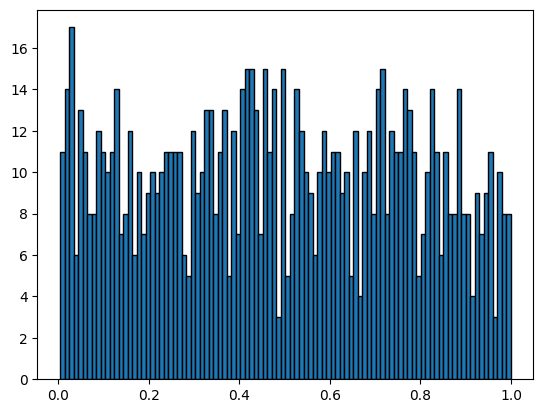

In [32]:
plt.hist(p_value_uniform, bins=100, edgecolor='black')

Получили примерно равномерное распределение p_value

___

## Задание 6: Мощность t-критерия. Построение кривых мощности.
Наблюдения в двух выборках взяты из нормальных распределений с sigma = 400. Матожидание первой выборки равно 1200, а матожидание второй выборки изменяется относительно первого с некоторым шагом. Постройте кривую мощности для изменения матожидания c шагом от 0,5% до 5%.

___

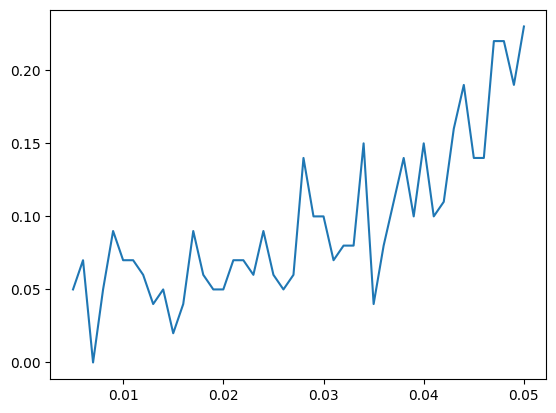

In [33]:
iterations = 100
low_threshold = 0.005
high_threshold = 0.05
step = 0.001
size = 100
mu, sigma = 1200, 400
alpha = 0.05

multipliers = np.arange(low_threshold, high_threshold, step)
points = []
for multiplier in multipliers:
  mu2 = mu * (1 + multiplier)
  reject = 0
  for _ in range(iterations):
    x1_normal = np.random.normal(loc=mu, scale=sigma, size=size)
    x2_normal = np.random.normal(loc=mu2, scale=sigma, size=size)
    t_stat, p_value = welchs_test_pvalue(x1=x1_normal, x2=x2_normal)
    if p_value < alpha:
      reject +=1
  point = reject / iterations
  points.append(point)

plt.plot(multipliers, points)